<a href="https://colab.research.google.com/github/clferreira1985/PUC_RJ-Pos_Ciencia_de_Dados_e_Analytics/blob/main/Machine_Learning/MVP_Hotel_Reservations_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Prevendo cancelamentos de hotéis




**Contexto:** A empresa teve aumento significativo na taxa de cancelamento, então temos um dataset com todas as informações que a empresa coletou dos agendamento realizados no período de 2017 a 2018. O objetivo deste notebook é prever a intenção de de compra do consumidor com a maquina preditiva que melhor se performar.

Deixo uma observação que dentro desse trabalho não iremos fazer o balanceamento dos dados, então pode ser que o algoritimo pode volta-se a classe com mais instância.

**Estrutura**: O notebook está dividido assim:



1.   Imports das bibliotecas
2.   Acesso e tratamento dos dados
3.   Pré-processamento dos dados

**Dataset:** O dataset foi baixado do Kaggle, uma plataforma online voltada para cientistas de dados, entusiastas de aprendizado de máquina e profissionais afins. O uso é estritamente didático. Para mais informações sobre o dataset, veja o link a seguir: [Hotel Reservation](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset).



## 1. Imports das bibliotecas

In [96]:
#Import das bibliotecas
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos



## 2. Acesso e tratamento dos dados

In [62]:
# Carrega o dataset
df = pd.read_csv('https://raw.githubusercontent.com/clferreira1985/Projetos_Python/main/Hotel_Reservations_Dataset/Hotel%20Reservations.csv')


In [63]:
#Amostra
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
# Shape
df.shape

(36275, 19)

In [65]:
#Alterando os nomes das colunas
df.rename(columns=({'Booking_ID':'reserva',
                    'no_of_adults':'qnt_de_adultos',
                    'no_of_children':'qnt_de_crianças',
                    'no_of_weekend_nights':'qnd_dias_final_de_semana',
                    'no_of_week_nights':'qnd_dias_úteis',
                    'type_of_meal_plan':'tipo_de_refeição',
                    'required_car_parking_space':'vaga_de_estacionamento',
                    'room_type_reserved':'tipo_de_reserva',
                    'lead_time':'tempo_de_reserva',
                    'arrival_year':'ano',
                    'arrival_month':'mês',
                    'arrival_date':'dia',
                    'market_segment_type':'canal_de_compra',
                    'repeated_guest':'qnt_de_hospedagem',
                    'no_of_previous_cancellations':'qnt_de_cancelamentos_anteriores',
                    'no_of_previous_bookings_not_canceled': 'qnt_de_reservas_anteriores_não_canceladas',
                    'avg_price_per_room':'media_dos_precos',
                    'no_of_special_requests':'qnt_de_pedidos_especiais',
                    'booking_status':'status_da_reserva',
                    'have_child':'tem filhos'}),inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   reserva                                    36275 non-null  object 
 1   qnt_de_adultos                             36275 non-null  int64  
 2   qnt_de_crianças                            36275 non-null  int64  
 3   qnd_dias_final_de_semana                   36275 non-null  int64  
 4   qnd_dias_úteis                             36275 non-null  int64  
 5   tipo_de_refeição                           36275 non-null  object 
 6   vaga_de_estacionamento                     36275 non-null  int64  
 7   tipo_de_reserva                            36275 non-null  object 
 8   tempo_de_reserva                           36275 non-null  int64  
 9   ano                                        36275 non-null  int64  
 10  mês                   

In [7]:
# Temos valores nulos?
df.isna().sum()

reserva                                      0
qnt_de_adultos                               0
qnt_de_crianças                              0
qnd_dias_final_de_semana                     0
qnd_dias_úteis                               0
tipo_de_refeição                             0
vaga_de_estacionamento                       0
tipo_de_reserva                              0
tempo_de_reserva                             0
ano                                          0
mês                                          0
dia                                          0
canal_de_compra                              0
qnt_de_hospedagem                            0
qnt_de_cancelamentos_anteriores              0
qnt_de_reservas_anteriores_não_canceladas    0
media_dos_precos                             0
qnt_de_pedidos_especiais                     0
status_da_reserva                            0
dtype: int64

In [8]:
#quantidade de categorias por coluna
df.select_dtypes(include='object').drop(columns = 'reserva').nunique()

tipo_de_refeição     4
tipo_de_reserva      7
canal_de_compra      5
status_da_reserva    2
dtype: int64

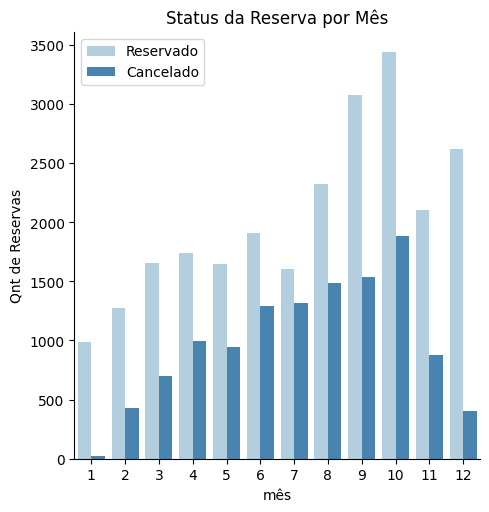

In [9]:
#plot

sns.catplot(data=df, x='mês', kind='count', palette = "Blues", hue='status_da_reserva', legend_out=False)
plt.ylabel('Qnt de Reservas')
plt.xlabel('mês')
plt.title('Status da Reserva por Mês')
plt.legend(['Reservado', 'Cancelado'])
plt.show()

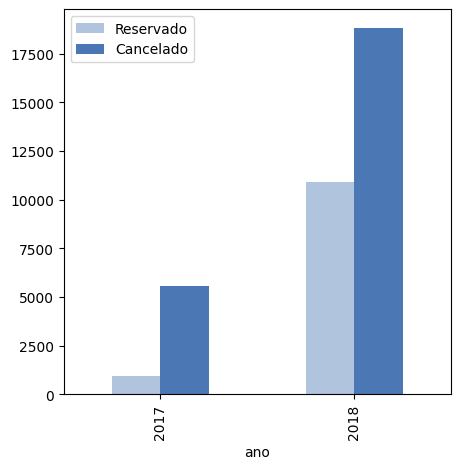

In [10]:
pd.crosstab(df["ano"], df['status_da_reserva']).plot(kind='bar',
                                                      stacked = False,
                                                      figsize = (5, 5),
                                                      color = ['lightsteelblue','#4b78b4']).legend(['Reservado', 'Cancelado'])


Text(0.5, 1.0, 'Status da Reserva por Mês')

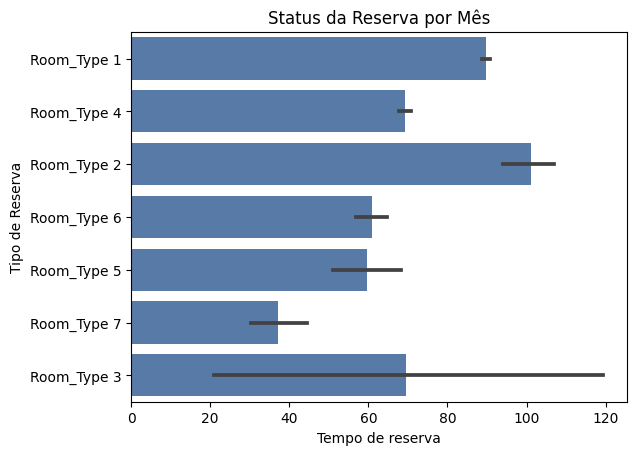

In [79]:
df_sorted = df.sort_values('tipo_de_reserva')
order = df_sorted['tipo_de_reserva'].unique()
sns.barplot(x= "tempo_de_reserva",color = "#4b78b4", y = "tipo_de_reserva",data = df)
plt.ylabel('Tipo de Reserva')
plt.xlabel('Tempo de reserva')
plt.title('Tempo de Reserva por quarto')

Text(0.5, 1.0, 'Preço por quarto')

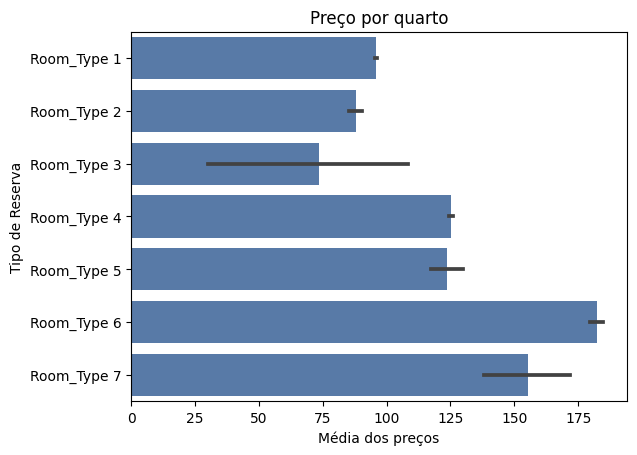

In [87]:
sns.barplot(x= "media_dos_precos",color = "#4b78b4", y = "tipo_de_reserva",data = df, order=order)
plt.ylabel('Tipo de Reserva')
plt.xlabel('Média dos preços')
plt.title('Preço por quarto')

### **Resumo**

Verificamos que embora o volume de agendamentos tenha aumentado, os pedidos de cancelamentos teve um aumento significativo. Foi notado que entre o período de junho a outubro de 2018 têm quantidade maior de cancelamento




## 3º Pré-processamento dos dados


#### Encode Classes

 - transformando as colunas categóricas. Quando a coluna tiver até 4 atributos utilizarei o label_encoder, acima disso usaremos o OneHotEncoder

In [11]:
label_encoder = preprocessing.LabelEncoder()
encoder=preprocessing.OneHotEncoder()

#Iteramdo sobre as colunas do DataFrame
for column in df.select_dtypes(include='object').drop(columns = 'reserva'):
    if df[column].nunique() < 5:
        # Aplicando o LabelEncoder na colunas que tem <=4
        df[column] = label_encoder.fit_transform(df[column])
    else:
        #Aplicando o OneHotencoder nas colunas que tem mais de 4 categorias
        df_encoded = df[column] = encoder.fit_transform(df[column].values.reshape(-1, 1)).toarray()
        #Criando novas colunas com os dados codificados
        column_names = [f"{column}_{i}" for i in range(df_encoded.shape[1])]
        df_encoded = pd.DataFrame(df_encoded, columns=column_names)
        df=pd.concat([df, df_encoded], axis=1)
        #Removendo a coluna original
        df.drop(column, axis=1, inplace=True)

In [12]:
  df.drop('reserva', axis=1, inplace=True)
  df.head()

,qnt_de_adultos,qnt_de_crianças,qnd_dias_final_de_semana,qnd_dias_úteis,tipo_de_refeição,vaga_de_estacionamento,tempo_de_reserva,ano,mês,dia,...,tipo_de_reserva_2,tipo_de_reserva_3,tipo_de_reserva_4,tipo_de_reserva_5,tipo_de_reserva_6,canal_de_compra_0,canal_de_compra_1,canal_de_compra_2,canal_de_compra_3,canal_de_compra_4
0,2,0,1,2,0,0,224,2017,10,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,2,3,3,0,5,2018,11,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,2,1,0,0,1,2018,2,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,0,0,2,0,0,211,2018,5,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,0,1,1,3,0,48,2018,4,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
df.shape

(36275, 28)

#### Separação em conjunto de treino e conjunto de teste com holdout




In [15]:
#separação em bases de treino e teste (holdout)
X=df.drop('status_da_reserva', axis=1)
y=df['status_da_reserva']
test_size=0.30 # Tamanho do conungto de teste
seed = 9 # semente aleatória
num_particoes=10
scoring='accuracy'
print(X.shape)
print(y.shape)

(36275, 27)
(36275,)


In [33]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", df.columns[0:27])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
scores=pd.DataFrame({'Atributo':X.columns, 'Score': fit.scores_})
selected_features = X.columns[best_var.get_support()]

print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", X.columns[best_var.get_support()])

# Combina os atributos selecionados com seus respectivos scores

selected_features_scores = scores[scores['Atributo'].isin(selected_features)]

print("\nAtributos Selecionados com seus Scores:")
print(selected_features_scores)


Número original de atributos: 27

Número reduzido de atributos: 4

Atributos Originais: Index(['qnt_de_adultos', 'qnt_de_crianças', 'qnd_dias_final_de_semana',
       'qnd_dias_úteis', 'tipo_de_refeição', 'vaga_de_estacionamento',
       'tempo_de_reserva', 'ano', 'mês', 'dia', 'qnt_de_hospedagem',
       'qnt_de_cancelamentos_anteriores',
       'qnt_de_reservas_anteriores_não_canceladas', 'media_dos_precos',
       'qnt_de_pedidos_especiais', 'status_da_reserva', 'tipo_de_reserva_0',
       'tipo_de_reserva_1', 'tipo_de_reserva_2', 'tipo_de_reserva_3',
       'tipo_de_reserva_4', 'tipo_de_reserva_5', 'tipo_de_reserva_6',
       'canal_de_compra_0', 'canal_de_compra_1', 'canal_de_compra_2',
       'canal_de_compra_3'],
      dtype='object')

Scores dos Atributos Originais: [2.761e+02 3.973e+01 1.380e+02 3.164e+02 2.589e+01 2.714e+02 8.637e+03
 1.208e+03 4.578e+00 4.098e+00 4.224e+02 4.131e+01 1.318e+02 7.526e+02
 2.482e+03 1.499e+01 1.088e-02 5.585e-02 6.426e+00 3.792e+00 3.871e+01
 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_size,
                                                    shuffle=True,
                                                    random_state=seed) # holdout com estratificação

kfold = StratifiedKFold(n_splits=num_particoes,
                        shuffle=True,
                        random_state=seed) #validação cruzada com estratificação


##4.Modelagem e Inferência



#### Criação e avaliação de modelos:linha base

Iremos construir um algoritmo que irá realizar uma comparação de desempenho de vários modelos de classificação usando a técnica de validação cruzada. Ele criará e avaliará diferentes modelos, armazenando os resultados em uma lista de e, em seguida criará um boxplot para comparar o desempenho dos modelos.

In [18]:
# definindo uma semente global
np.random.seed(9)

#Lista que armazenará os modelos
models = []

#Criando os modelos e adicionando-os na lista de modelos

models.append(('LR', LogisticRegression(max_iter=100)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#Definindo os parâmetros do classificador base para o bagginclassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=100)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(("cart", model2))
model3 = SVC()
bases.append(('SVM',model3))

# Criando os ensembles e adicionando-os na lista de modelos

models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))






In [19]:
# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.799070 (0.007248)
KNN: 0.805057 (0.009815)
CART: 0.862437 (0.007368)
NB: 0.412335 (0.006894)
SVM: 0.763153 (0.006074)
Bagging: 0.894967 (0.005246)
RF: 0.896621 (0.004416)
ET: 0.886539 (0.005061)
Ada: 0.820455 (0.007034)
GB: 0.852001 (0.007668)
Voting: 0.818761 (0.008474)


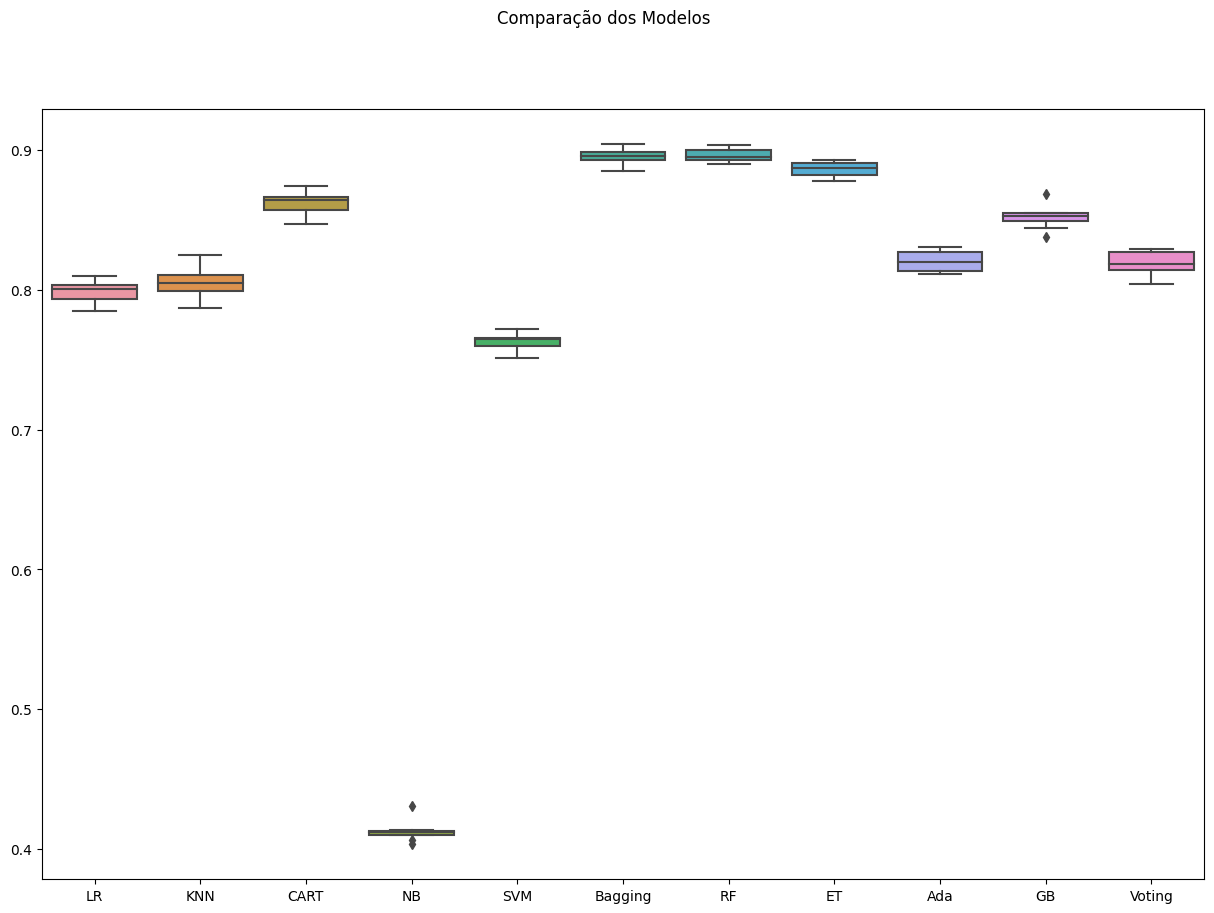

In [20]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.show()

Com base nos resultados apresentados, o modelo que obteve o melhor desempenho médio foi o Random Forest (RF), com uma pontuação média de 0.896621. O modelo Bagging (Bagging) também obteve um desempenho elevado, com uma pontuação média de 0.894967.

É importante notar que a escolha do melhor modelo também depende da tarefa específica e das métricas de avaliação relevantes para o problema em questão. Além disso, os desvios padrão (indicados entre parênteses) fornecem uma medida da variabilidade dos resultados entre as dobras de validação cruzada. Um menor desvio padrão pode indicar maior consistência e confiabilidade nas estimativas de desempenho.





#### Criação e avaliação de modelos: dados padronizados e normalizados

Iremos criar um algoritmo que realizará a comparação de desempenho de vários modelos classificação em diferentes visões dos dados. Ele criará pipelines que combinam algoritmos de classificação com diferentes transformações de dados, executará os pipelines usandos validação cruzada e exibe um gráfico de boxplot para comparar os resultados.


LR-orig: 0.799 (0.007)
KNN-orig: 0.805 (0.010)
CART-orig: 0.862 (0.007)
NB-orig: 0.412 (0.007)
SVM-orig: 0.763 (0.006)
Bag-orig: 0.895 (0.005)
RF-orig: 0.897 (0.004)
ET-orig: 0.887 (0.005)
Ada-orig: 0.820 (0.007)
GB-orig: 0.852 (0.008)
Vot-orig: 0.819 (0.008)
LR-padr: 0.806 (0.007)
KNN-padr: 0.847 (0.004)
CART-padr: 0.862 (0.005)
NB-padr: 0.408 (0.007)
SVM-padr: 0.835 (0.008)
Bag-padr: 0.897 (0.003)
RF-padr: 0.897 (0.004)
ET-padr: 0.886 (0.005)
Ada-padr: 0.820 (0.007)
GB-padr: 0.852 (0.008)
Vot-padr: 0.848 (0.007)
LR-norm: 0.804 (0.007)
KNN-norm: 0.846 (0.008)
CART-norm: 0.862 (0.006)
NB-norm: 0.408 (0.007)
SVM-norm: 0.818 (0.008)
Bag-norm: 0.896 (0.004)
RF-norm: 0.896 (0.004)
ET-norm: 0.886 (0.004)
Ada-norm: 0.820 (0.007)
GB-norm: 0.852 (0.008)
Vot-norm: 0.825 (0.006)


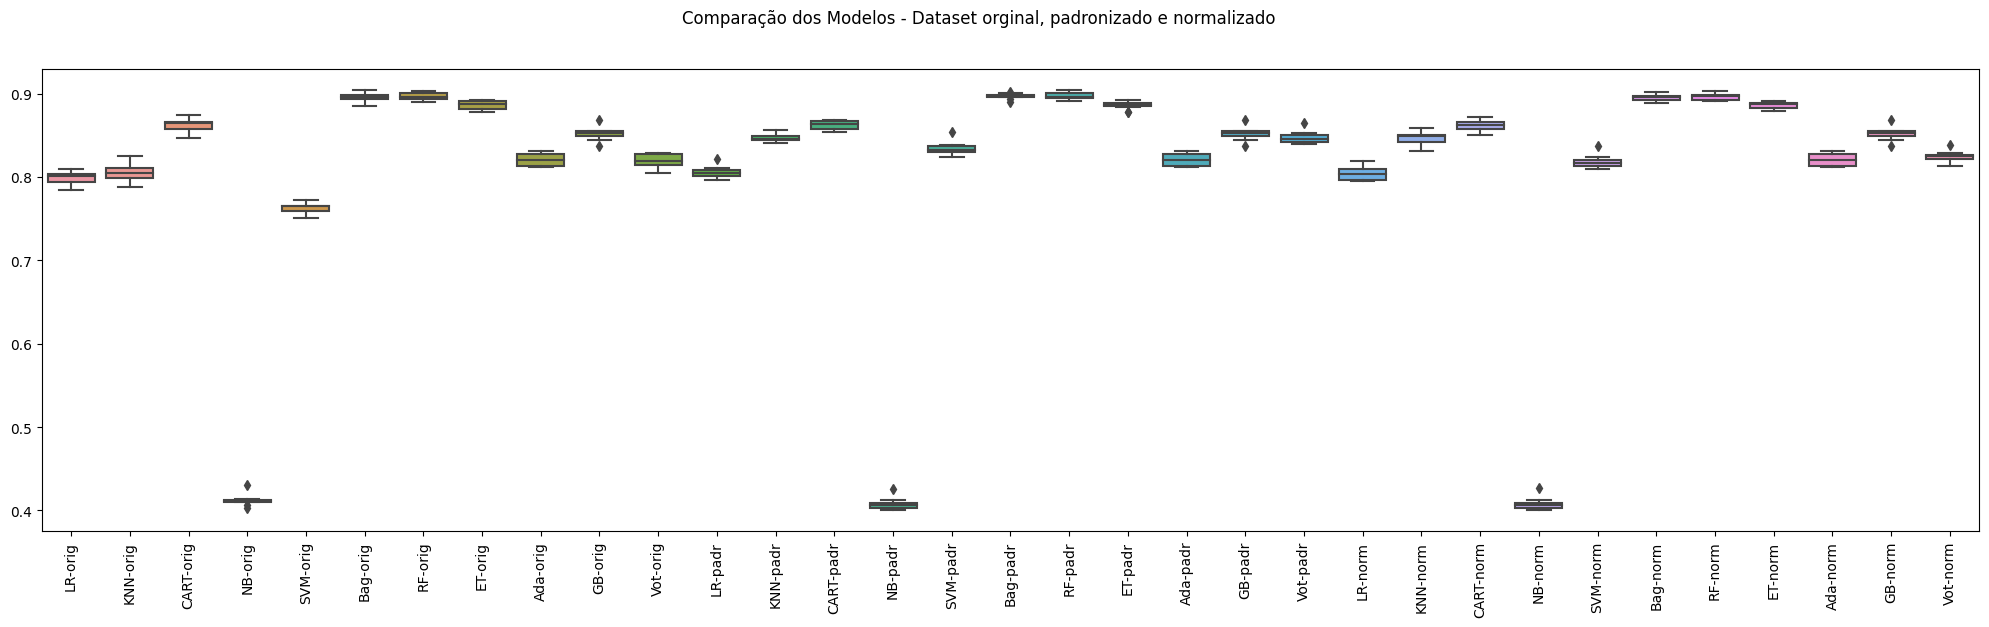

In [21]:
np.random.seed(9) # definindo uma semente global para este bloco

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results=[]
names=[]

#Criando os elementos do pipeline

#Algoritimo que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=100))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

#Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ("MinMaxScaler", MinMaxScaler())

#Montando os pipelines

pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names, rotation=90)
plt.show()


Com base nos resultados apresentados, aqui estão os três melhores modelos em termos de desempenho médio:

1.   Random Forest (RF-orig): Com uma pontuação média de 0.897, o modelo Random Forest obteve o melhor desempenho geral.
2.   Bagging (Bag-orig): Com uma pontuação média de 0.895, o modelo Bagging ficou em segundo lugar em termos de desempenho.
3.   Extra Trees (ET-orig): Com uma pontuação média de 0.887, o modelo Extra Trees ficou em terceiro lugar.

É importante notar que esses resultados são específicos para o conjunto de dados e para as configurações usadas no código fornecido. Em diferentes conjuntos de dados ou com outras configurações, como por exemplo: o balanceamento dos dados, os resultados podem variar.

Ao avaliar os melhores resultados, é essencial considerar não apenas a pontuação média, mas também o desvio padrão associado. Um desvio padrão menor indica menor variabilidade nos resultados e maior confiabilidade das estimativas de desempenho.


#### Otimização dos hiperparâmetros

No projeto em questão não deixei o código utilizado como comentário, pois o código demorou 1h30min para gerar o resultado. Caso queira rodar o projeto, deixei como exemplo de hiperparametro o KNN.

In [22]:
# Tuning do RF
#np.random.seed(9) #Definindo uma semente global para este bloco

#num_trees = 100
#max_features = 3

#pipelines = []

#Definindo os componentes do pipeline
#rf = ('RandomForest', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
#standard_scaler = ('StandardScaler', StandardScaler())
#min_max_scaler = ('MinMaxScaler', MinMaxScaler())

#pipelines.append(('rf-orig', Pipeline(steps=[rf])))
#pipelines.append(('rf-padr', Pipeline(steps=[standard_scaler, rf])))
#pipelines.append(('rf-norm', Pipeline(steps=[min_max_scaler, rf])))

#param_grid = {
#    'RandomForest__n_estimators': [100, 200, 300],
#    'RandomForest__max_depth': [None, 5, 10, 20],
#    'RandomForest__min_samples_split':[2,5, 10],
#}

 #Prepara e executa o GridSearchCV
#for name, model in pipelines:
 # grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
 # grid.fit(X_train, y_train)
  #imprime a melhor configuração
 # print('%s - Melhor: %f usando %s' % (name, grid.best_score_, grid.best_params_))

# Resultado do código acima

#rf-orig - Melhor: 0.897763 usando {'RandomForest__max_depth': None, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 100}
#rf-padr - Melhor: 0.897645 usando {'RandomForest__max_depth': None, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 300}
#rf-norm - Melhor: 0.898196 usando {'RandomForest__max_depth': None, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 200}

In [23]:
np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

knn-orig - Melhor: 0.817030 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 7}
knn-padr - Melhor: 0.851174 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
knn-norm - Melhor: 0.850741 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}


              precision    recall  f1-score   support

           0       0.88      0.81      0.84      3541
           1       0.91      0.94      0.93      7342

    accuracy                           0.90     10883
   macro avg       0.89      0.88      0.88     10883
weighted avg       0.90      0.90      0.90     10883



<Axes: >

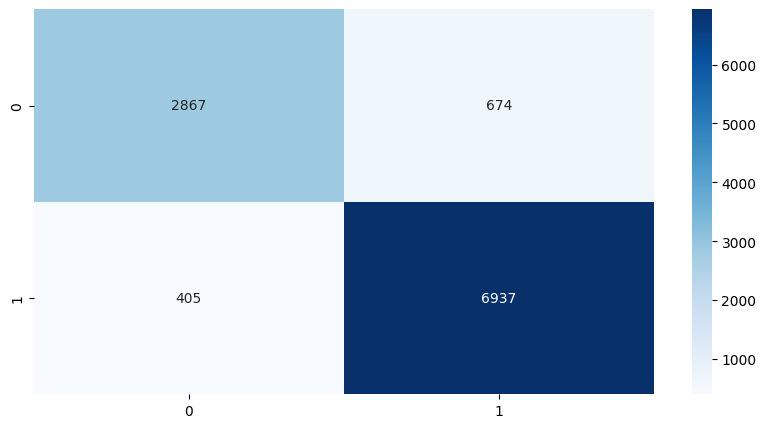

In [24]:
#decidi utilizar o rf-orig
rfc = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=100)

rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
Confusion_Matrix = confusion_matrix(y_test, predictions)
print(classification_report(y_test,predictions))
plt.figure(figsize=(10,5))
sns.heatmap(Confusion_Matrix, annot=True, fmt='.0f', cmap='Blues')


#### Finalização do Modelo



In [25]:
# Avaliação do modelo com o conjunto de teste

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledx = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=200)
model.fit(rescaledx, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestx = scaler.transform(X_test) # aplicação da padronização no conjunto teste
predictions = model.predict(rescaledTestx)
print(accuracy_score(y_test, predictions))

0.9029679316364972


In [26]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

RandomForestClassifier(n_estimators=200)

In [56]:
# Novos dados - não sabemos a classe!
data = {'qnt_de_adultos':  [2, 1, 2, 2, 2],
        'qnt_de_crianças': [2, 1, 2, 2, 10],
        'qnd_dias_final_de_semana': [2, 5, 2, 2, 2],
        'qnd_dias_úteis': [4, 4, 3, 3, 3],
        'tipo_de_refeição': [0, 2, 0, 0, 0],
        'vaga_de_estacionamento': [0, 0, 0, 0, 0],
        'tempo_de_reserva': [300, 300, 300, 200, 5],
        'ano': [2017, 2017, 2018, 2018, 2018],
        'mês': [7,7,8, 8, 8],
        'dia':[5, 5, 20, 20, 30],
        'qnt_de_hospedagem':[4, 2, 4, 4, 4],
        'qnt_de_cancelamentos_anteriores':[0,0,0, 1, 1],
        'qnt_de_reservas_anteriores_não_canceladas': [0,0,0, 1, 1],
        'media_dos_precos':[100, 120, 200, 250, 1000],
        'qnt_de_pedidos_especiais': [0, 1, 3, 0, 1],
        'tipo_de_reserva_0':[1,0,0,1,1],
        'tipo_de_reserva_1':[0,0,0,0,0],
        'tipo_de_reserva_2':[0,0,0,0,0],
        'tipo_de_reserva_3':[0,0,0,0,0],
        'tipo_de_reserva_4':[0,1,0,0,0],
        'tipo_de_reserva_5':[0,0,0,0,0],
        'tipo_de_reserva_6':[0,0,1,0,0],
        'canal_de_compra_0':[0,0,0,0,0],
        'canal_de_compra_1':[0,1,0,1,1],
        'canal_de_compra_2':[1,0,0,0,0],
        'canal_de_compra_3':[0,0,1,0,0],
        'canal_de_compra_4':[0,0,0,0,0],
        }

atributos = ['qnt_de_adultos',
             'qnt_de_crianças',
             'qnd_dias_final_de_semana',
             'qnd_dias_úteis',
             'tipo_de_refeição',
             'vaga_de_estacionamento',
             'tempo_de_reserva',
             'ano',
             'mês',
             'dia',
             'qnt_de_hospedagem',
             'qnt_de_cancelamentos_anteriores',
             'qnt_de_reservas_anteriores_não_canceladas',
             'media_dos_precos',
             'qnt_de_pedidos_especiais',
             'tipo_de_reserva_0',
             'tipo_de_reserva_1',
             'tipo_de_reserva_2',
             'tipo_de_reserva_3',
             'tipo_de_reserva_4',
             'tipo_de_reserva_5',
             'tipo_de_reserva_6',
             'canal_de_compra_0',
             'canal_de_compra_1',
             'canal_de_compra_2',
             'canal_de_compra_3',
             'canal_de_compra_4',
             ]
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:27].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 2.989e-01  4.706e+00  1.366e+00  1.273e+00 -4.920e-01 -1.788e-01
   2.499e+00 -2.137e+00 -1.380e-01 -1.212e+00  2.515e+01 -6.339e-02
  -8.746e-02 -9.757e-02 -7.881e-01  5.381e-01 -1.395e-01 -1.389e-02
  -4.477e-01 -8.579e-02 -1.654e-01 -6.614e-02 -5.880e-02 -1.044e-01
   4.121e+00 -6.395e-01 -1.333e+00]
 [-1.629e+00  2.222e+00  4.812e+00  1.273e+00  1.416e+00 -1.788e-01
   2.499e+00 -2.137e+00 -1.380e-01 -1.212e+00  1.249e+01 -6.339e-02
  -8.746e-02  4.724e-01  4.838e-01 -1.858e+00 -1.395e-01 -1.389e-02
  -4.477e-01  1.166e+01 -1.654e-01 -6.614e-02 -5.880e-02  9.580e+00
  -2.426e-01 -6.395e-01 -1.333e+00]
 [ 2.989e-01  4.706e+00  1.366e+00  5.640e-01 -4.920e-01 -1.788e-01
   2.499e+00  4.678e-01  1.877e-01  5.038e-01  2.515e+01 -6.339e-02
  -8.746e-02  2.752e+00  3.028e+00 -1.858e+00 -1.395e-01 -1.389e-02
  -4.477e-01 -8.579e-02 -1.654e-01  1.512e+01 -5.880e-02 -1.044e-01
  -2.426e-01  1.564e+00 -1.333e+00]
 [ 2.989e-01  4.706e+00  1.366e+00  5.640e-01 -4.920e-01 -1.788e-01
   1.336

In [54]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 0 1 0 1]


Foi observado que o consumidor é sensivel ao preço nos períodos onde tem o maiores índices de cancelamentos, fiz um te